In [ ]:
import pandas as pd
import seaborn as sns                                                                                     
import matplotlib.pyplot as plt

In [260]:
sns.set_theme(style="darkgrid")
sns.set_palette("rocket_r")

In [ ]:
results = pd.read_csv("/Users/ochsneto/Documents/BDMM/BDMM-Flow/results.csv")
results.describe()

,node_count,leaf_count,types_count,process_length,flow_likelihood,flow_duration,bdmm_likelihood,bdmm_duration,num_intervals
count,75401.000000,75401.000000,75401.000000,75401.000000,7.540100e+04,7.540100e+04,7.540100e+04,7.540100e+04,75401.000000
mean,207.848477,104.424238,6.001817,2.750896,-8.530480e+02,1.170625e+06,-8.530480e+02,5.024601e+06,2.498468
std,2484.872172,1242.436086,2.582241,1.593450,1.279915e+04,3.207586e+07,1.279915e+04,5.165053e+07,1.500009
min,3.000000,2.000000,2.000000,0.000191,-1.174417e+06,4.270800e+04,-1.174417e+06,2.704100e+04,1.000000
25%,3.000000,2.000000,4.000000,1.358899,-8.901714e+01,1.925830e+05,-8.901713e+01,1.322090e+05,1.000000
50%,9.000000,5.000000,6.000000,2.754005,-1.499489e+01,3.940000e+05,-1.499489e+01,3.373330e+05,1.000000
75%,39.000000,20.000000,8.000000,4.138155,-5.491336e+00,8.674160e+05,-5.491336e+00,1.338834e+06,4.000000
max,214191.000000,107096.000000,10.000000,5.499939,5.046897e+00,5.253695e+09,5.046897e+00,7.055983e+09,4.000000


In [262]:
results = results[results["leaf_count"] > 10]
results["speedup"] = results["bdmm_duration"] / results["flow_duration"]
results["binned_leaves"] = results["leaf_count"].apply(lambda x: x // 200 * 200)

In [263]:
vanilla_flow = results[(results["use_inverse_flow"] == False) & (results["use_random_initial_matrix"] == False)]
random_initial = results[(results["use_inverse_flow"] == False) & (results["use_random_initial_matrix"] == True)]
inverse_flow = results[(results["use_inverse_flow"] == True) & (results["use_random_initial_matrix"] == False)]
inverse_flow_random_initial = results[(results["use_inverse_flow"] == True) & (results["use_random_initial_matrix"] == True)]

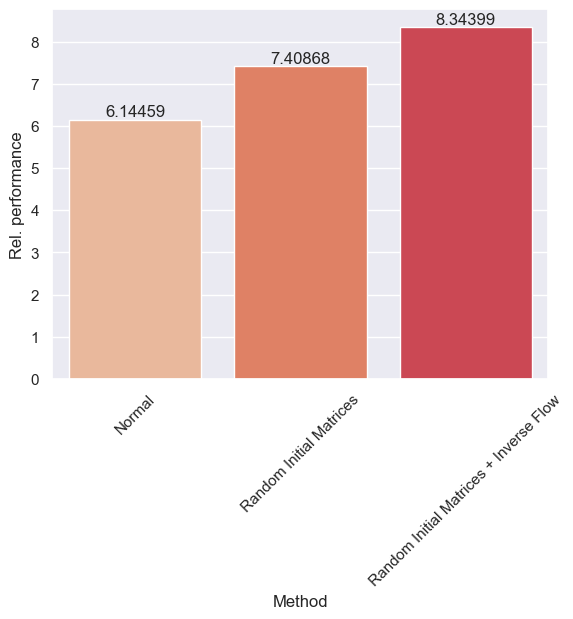

In [264]:
ax = sns.barplot(data=pd.DataFrame({
    "Method": [
        "Normal", 
        "Random Initial Matrices",
        "Random Initial Matrices + Inverse Flow",
    ],
    "Rel. performance": [
        vanilla_flow["speedup"].mean(),
        random_initial["speedup"].mean(),
        inverse_flow_random_initial["speedup"].mean(),
    ]
}), x="Method", y="Rel. performance")
plt.xticks(rotation=45)
for i in ax.containers:
    ax.bar_label(i,)

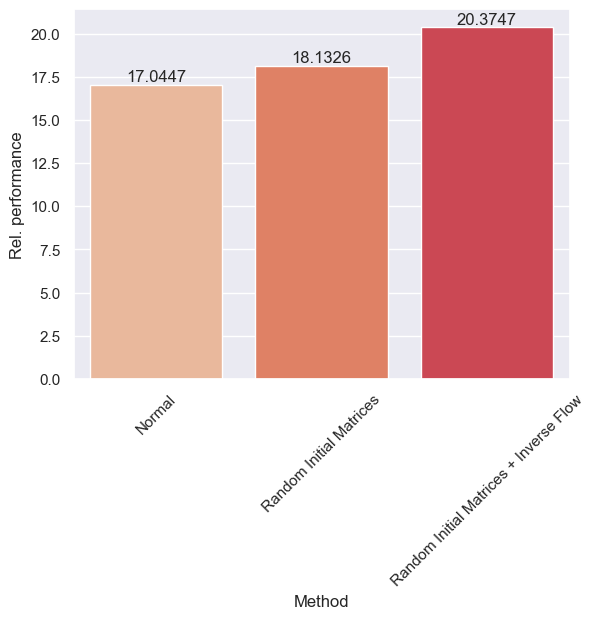

In [265]:
ax = sns.barplot(data=pd.DataFrame({
    "Method": [
        "Normal", 
        "Random Initial Matrices",
        "Random Initial Matrices + Inverse Flow",
    ],
    "Rel. performance": [
        vanilla_flow[vanilla_flow["leaf_count"] > 500]["speedup"].mean(),
        random_initial[random_initial["leaf_count"] > 500]["speedup"].mean(),
        inverse_flow_random_initial[inverse_flow_random_initial["leaf_count"] > 500]["speedup"].mean(),
    ]
}), x="Method", y="Rel. performance")

plt.xticks(rotation=45)

for i in ax.containers:
    ax.bar_label(i,)

Text(0, 0.5, 'BDMM Log Likelihood')

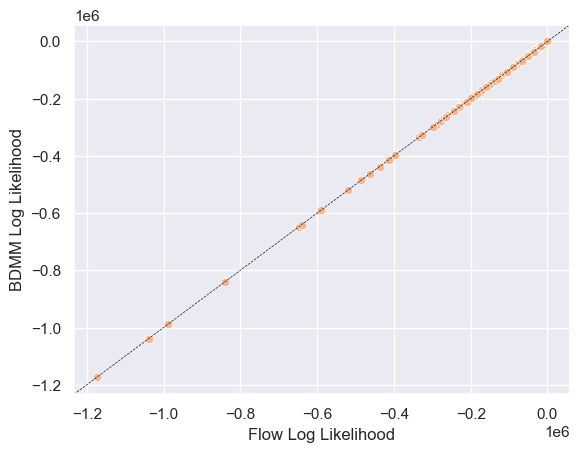

In [266]:
ax = sns.scatterplot(results, x="flow_likelihood", y="bdmm_likelihood")
ax.plot(ax.get_xlim(), ax.get_xlim(), linestyle='--', color='k', lw=0.5, scalex=False, scaley=False)

plt.xlabel('Flow Log Likelihood')
plt.ylabel('BDMM Log Likelihood')

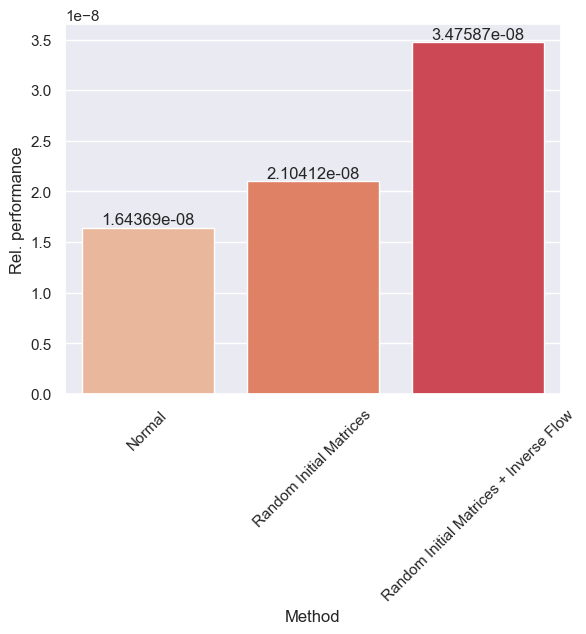

In [267]:
ax = sns.barplot(data=pd.DataFrame({
    "Method": [
        "Normal", 
        "Random Initial Matrices",
        "Random Initial Matrices + Inverse Flow",
    ],
    "Rel. performance": [
        ((vanilla_flow["bdmm_likelihood"] - vanilla_flow["flow_likelihood"]) / vanilla_flow["bdmm_likelihood"]).abs().mean(),
        ((random_initial["bdmm_likelihood"] - random_initial["flow_likelihood"]) / random_initial["bdmm_likelihood"]).abs().mean(),
        ((inverse_flow_random_initial["bdmm_likelihood"] - inverse_flow_random_initial["flow_likelihood"]) / inverse_flow_random_initial["bdmm_likelihood"]).abs().mean(), 
    ]
}), x="Method", y="Rel. performance")

plt.xticks(rotation=45)

for i in ax.containers:
    ax.bar_label(i,)

/var/folders/f_/r0jt4c1153v7d286lm9gbgx80000gn/T/ipykernel_42708/3710037941.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevant_results["algorithm"] = relevant_results.apply(lambda row: f'{row["use_inverse_flow"]}_{row["use_random_initial_matrix"]}', axis=1)


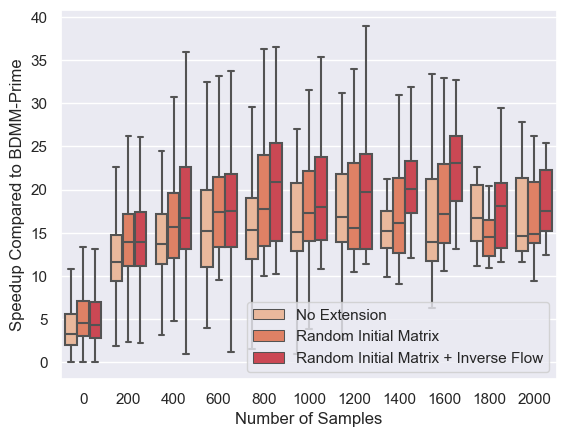

In [268]:
relevant_results = results[
    (results.use_inverse_flow & results.use_random_initial_matrix) |
    (~results.use_inverse_flow & results.use_random_initial_matrix) | 
    (~results.use_inverse_flow & ~results.use_random_initial_matrix)
]

relevant_results["algorithm"] = relevant_results.apply(lambda row: f'{row["use_inverse_flow"]}_{row["use_random_initial_matrix"]}', axis=1)
relevant_results = relevant_results.sort_values(by="algorithm")

ax = sns.boxplot(
    relevant_results[(relevant_results.binned_leaves < 2200)],
    x="binned_leaves", y="speedup", hue="algorithm",
    showfliers=False
)

ax.legend_.set_title(None)
ax.legend_.texts[0].set_text("No Extension")
ax.legend_.texts[1].set_text("Random Initial Matrix")
ax.legend_.texts[2].set_text("Random Initial Matrix + Inverse Flow")

plt.xlabel('Number of Samples')
plt.ylabel('Speedup Compared to BDMM-Prime')

plt.savefig("speedup_vs_sample_count.png", bbox_inches="tight", dpi=600)

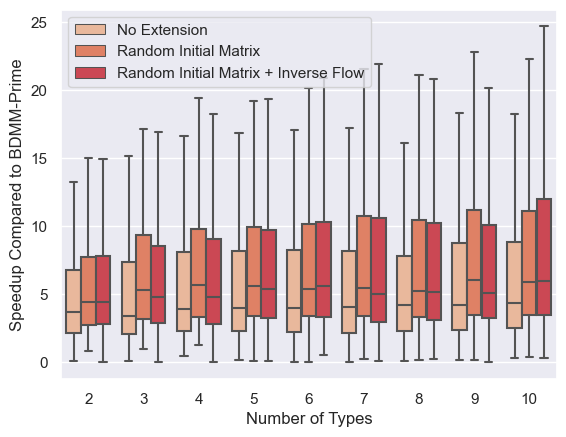

In [269]:
ax = sns.boxplot(
    relevant_results,
    x="types_count", y="speedup", hue="algorithm",
    showfliers=False
)

ax.legend_.set_title(None)
ax.legend_.texts[0].set_text("No Extension")
ax.legend_.texts[1].set_text("Random Initial Matrix")
ax.legend_.texts[2].set_text("Random Initial Matrix + Inverse Flow")

plt.xlabel('Number of Types')
plt.ylabel('Speedup Compared to BDMM-Prime')

plt.savefig("speedup_vs_type_count.png", bbox_inches="tight", dpi=600)